<a href="https://colab.research.google.com/github/ShikhaMaurya212402/Plant-Disease-Classification-Model/blob/main/AICTEProject_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [00:29<00:00, 98.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import glob as gb
import cv2

In [4]:
train = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [5]:
size = 224
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    preprocessing_function=None,
    validation_split=0.1
).flow_from_directory(
    train,
    target_size=(size, size),
    batch_size=164,
    class_mode='categorical',
    color_mode='rgb',
    subset='training',
    shuffle=True
)

Found 63282 images belonging to 38 classes.


In [6]:
train_generator

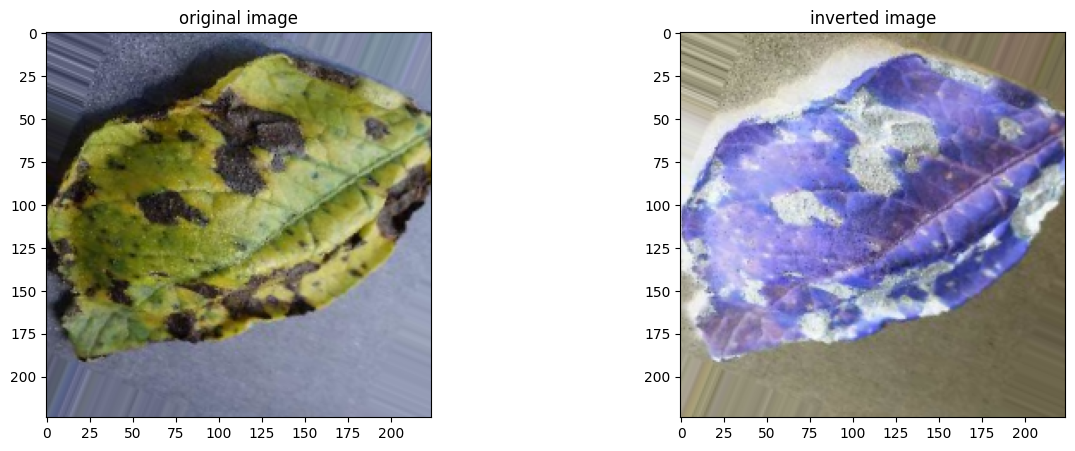

In [7]:
image, label  = train_generator[0]
fig,(ax1,ax2) = plt.subplots(figsize=(15,5),nrows=1,ncols=2)
ax1.imshow(image[0].transpose(1,0,2))
ax1.set_title("original image")
ax2.imshow(1-image[0].transpose(1,0,2))
ax2.set_title("inverted image")
plt.show()

In [8]:
for x, y in train_generator:
  print(x, x.shape)
  print(y, y.shape)
  break

[[[[0.52144605 0.45085782 0.44301468]
   [0.5444909  0.47390264 0.4660595 ]
   [0.53686816 0.46627992 0.4584368 ]
   ...
   [0.7101908  0.6709751  0.66313195]
   [0.70749384 0.66827816 0.660435  ]
   [0.70696783 0.6677521  0.65990895]]

  [[0.51200694 0.44141874 0.43357557]
   [0.5377841  0.46719584 0.4593527 ]
   [0.5398229  0.46923465 0.4613915 ]
   ...
   [0.70893896 0.6697233  0.66188014]
   [0.71163577 0.6724201  0.66457695]
   [0.7149399  0.6757242  0.6678811 ]]

  [[0.5025679  0.43197963 0.4241365 ]
   [0.528345   0.45775676 0.44991362]
   [0.54251975 0.47193155 0.4640884 ]
   ...
   [0.7188821  0.6796664  0.67182326]
   [0.7242759  0.6850602  0.67721707]
   [0.7296052  0.6903895  0.6825464 ]]

  ...

  [[0.5581521  0.5189364  0.5150148 ]
   [0.58125836 0.5420427  0.5381211 ]
   [0.6068787  0.567663   0.56374145]
   ...
   [0.82095116 0.8052649  0.8013433 ]
   [0.8211362  0.8054499  0.80152833]
   [0.8152995  0.79961324 0.79569167]]

  [[0.62560445 0.58638877 0.5824672 ]
   [0.6

In [9]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

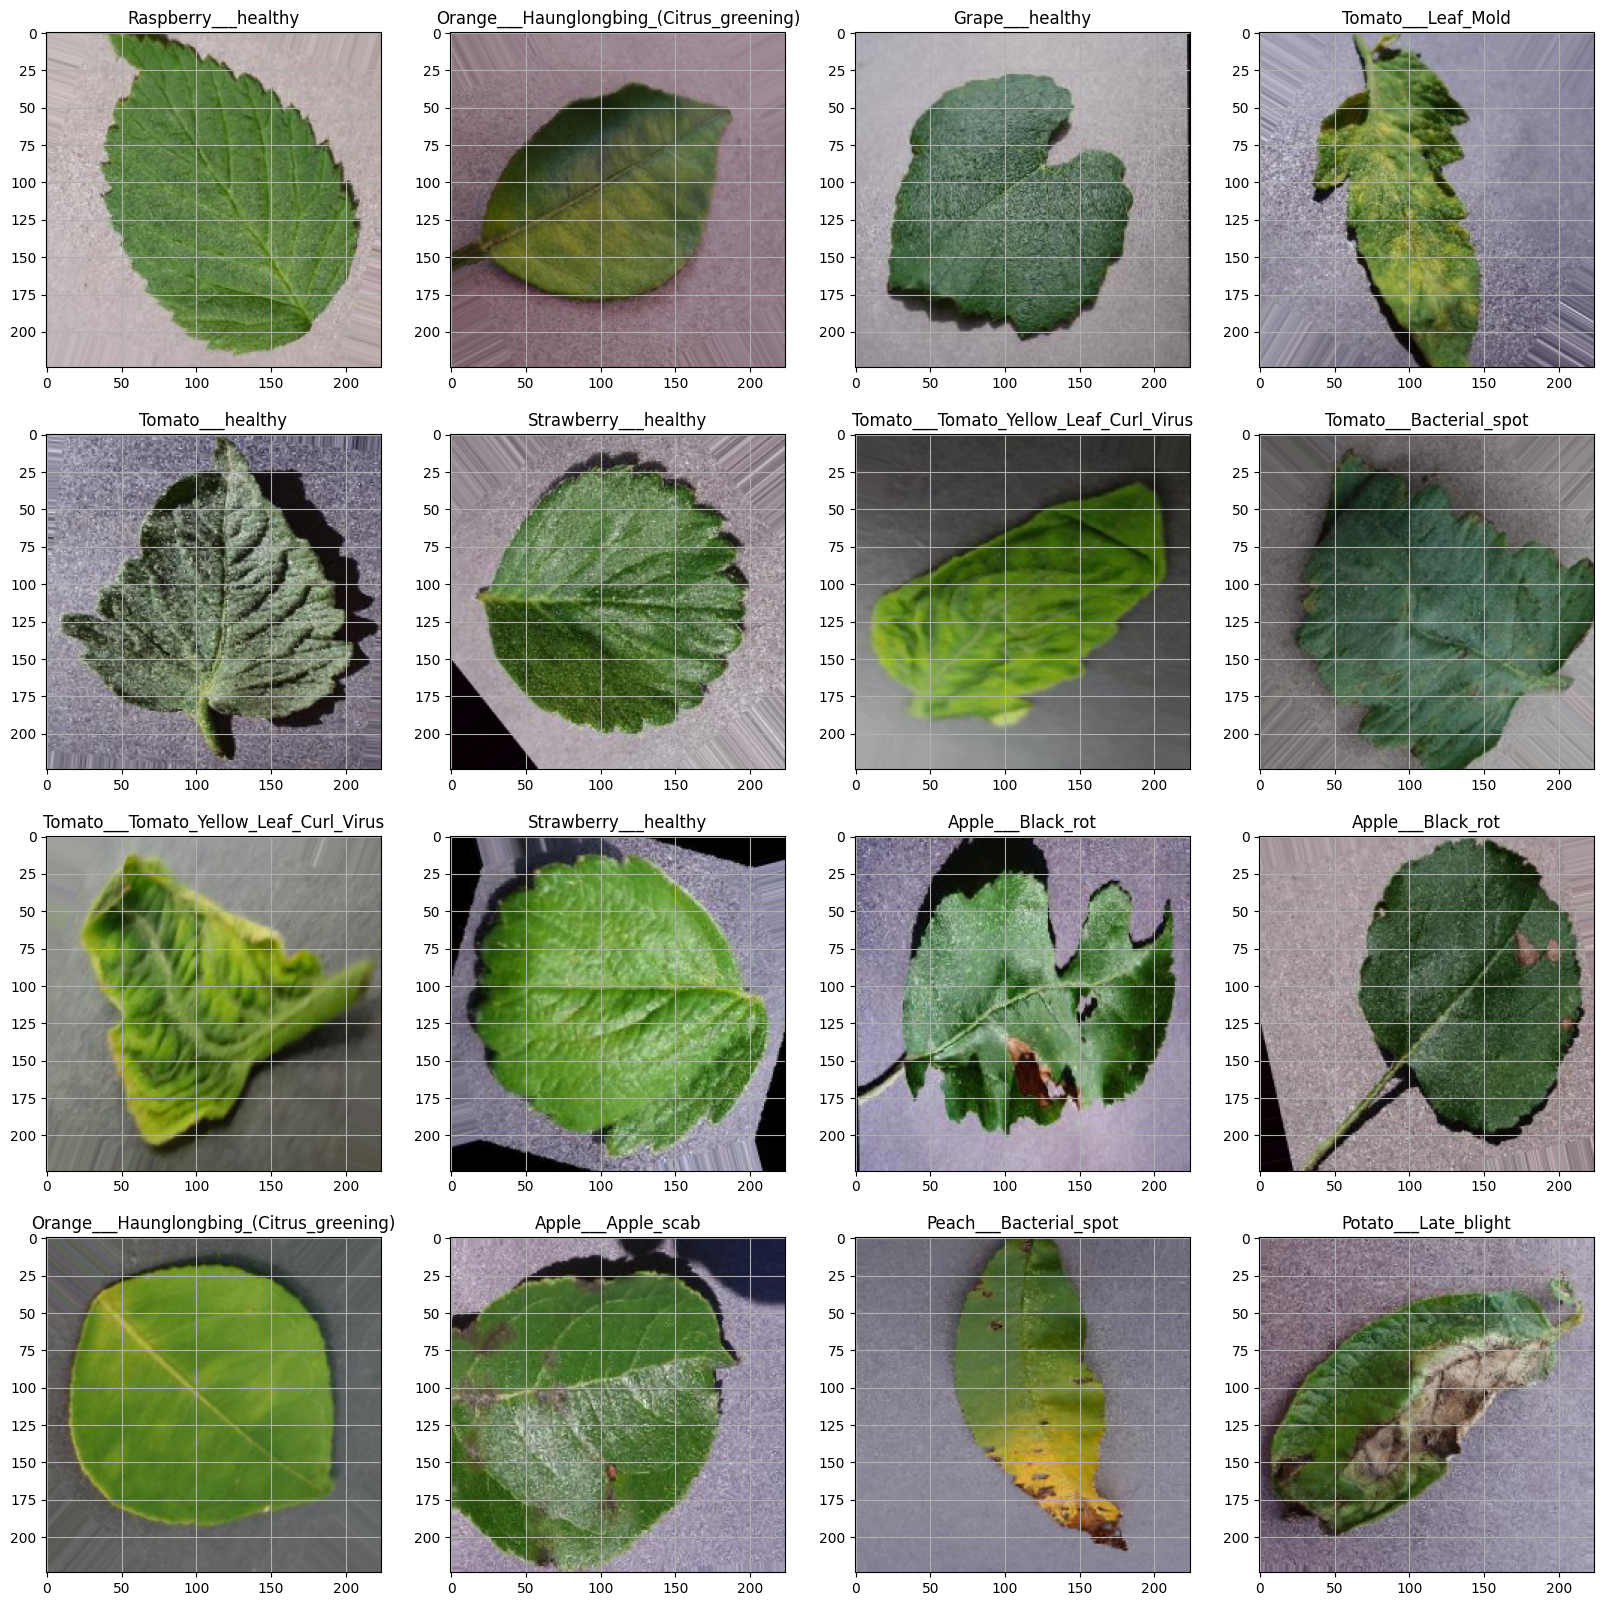

In [10]:
classes = list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
  for i in range(0, 16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_batch[i])
    plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    plt.grid(None)
  plt.show()
  break

In [11]:
valid = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [12]:
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function = None,
    validation_split=0.1
).flow_from_directory(valid,
                      batch_size=164,
                      target_size=(size, size),
                      class_mode='categorical',
                      color_mode='rgb',
                      subset='validation',
                      shuffle=False)

Found 1742 images belonging to 38 classes.


In [13]:
test = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function = None
).flow_from_directory(test,
                      batch_size=164,
                      target_size=(224, 224),
                      color_mode='rgb',
                      class_mode = 'categorical',
                      shuffle = False)


Found 17572 images belonging to 38 classes.


In [14]:
test_generator.class_indices


{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

Building Model

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Dropout
from keras.models import Sequential


In [16]:
model = Sequential()


In [ ]:
#to avoid overshooting
# choose small learning rate default 0.001 we are taking 0.0001
# there may be a chance of underfiiting so increase the number of neuron

In [17]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[224, 224, 3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [19]:
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [20]:
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [21]:
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [22]:
model.add(Dropout(0.25))

In [23]:
model.add(tf.keras.layers.Flatten())

In [24]:
model.add(Dense(units=1500, activation='relu'))

In [25]:
model.add(Dropout(0.4))

In [26]:
#output layer
model.add(Dense(units=38, activation='softmax'))

In [27]:
#compliling model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 222, 222, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 111, 111, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 54, 54, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 10, 10, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │      19,201,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,970,762 (91.44 MB)

 Trainable params: 23,970,762 (91.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#model training
training_history = model.fit(x=train_generator, validation_data=valid_generator, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 11/386 ━━━━━━━━━━━━━━━━━━━━ 7:55:44 76s/step - accuracy: 0.0288 - loss: 3.6361

In [ ]:
model.save('trained_model.h5')

In [ ]:
model.save('trained_model.keras')

In [ ]:
training_history.history

{'accuracy': [0.342656672000885,
  0.6840649843215942,
  0.7849151492118835,
  0.8280237913131714,
  0.8629152178764343,
  0.8819885849952698,
  0.9016308188438416,
  0.9137511253356934,
  0.9223949909210205,
  0.9279099702835083],
 'loss': [2.2967240810394287,
  1.0138654708862305,
  0.6841615438461304,
  0.5359896421432495,
  0.42349791526794434,
  0.3651125729084015,
  0.30399948358535767,
  0.26646220684051514,
  0.23883602023124695,
  0.21802744269371033],
 'val_accuracy': [0.5321469306945801,
  0.6412169933319092,
  0.6205511093139648,
  0.7548794746398926,
  0.7985074520111084,
  0.831228494644165,
  0.8490241169929504,
  0.8478760123252869,
  0.8805969953536987,
  0.8599311113357544],
 'val_loss': [1.6331477165222168,
  1.2650824785232544,
  1.3122837543487549,
  0.7750727534294128,
  0.6667464375495911,
  0.5491061210632324,
  0.4795370101928711,
  0.48437076807022095,
  0.37205663323402405,
  0.4664984345436096]}

In [ ]:
#recording the history in json
import json
with open('training_hostory.json', 'w') as f:
  json.dump(training_history.history, f)

Accuracy Visualization


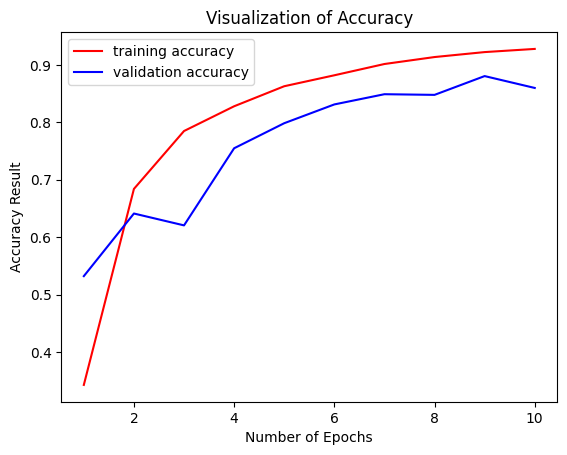

In [ ]:
epochs = list(range(1, 11))
plt.plot(epochs, training_history.history['accuracy'], color='red', label='training accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Result')
plt.title("Visualization of Accuracy")
plt.legend()
plt.show()


some other metrics for model evaluation


In [ ]:
class_name =list(valid_generator.class_indices.keys())
print(class_name)


['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32),
 (17572, 38))

In [ ]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([24, 24, 24, ..., 37, 37, 37])>

In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
y_true = tf.argmax(true_categories, axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.50      0.02      0.04       504
                                 Apple___Black_rot       0.81      0.19      0.30       497
                          Apple___Cedar_apple_rust       0.07      0.00      0.00       440
                                   Apple___healthy       0.00      0.00      0.00       502
                               Blueberry___healthy       0.73      0.28      0.41       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.02      0.05       421
                 Cherry_(including_sour)___healthy       0.04      0.00      0.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.73      0.02      0.04       410
                       Corn_(maize)___Common_rust_       0.97      0.06      0.12       477
               Corn_(maize)___Northern_Leaf_Blight       1.00      0.00      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
cn = confusion_matrix(y_true, predicted_categories)
cn

array([[ 10,  12,   0, ...,   0,   0,  83],
       [  0,  92,   0, ...,   0,   0,  38],
       [  0,   0,   1, ...,   0,  38, 122],
       ...,
       [  0,   0,  10, ...,  52,  18,  24],
       [  0,   1,   0, ...,   0,  24, 417],
       [  0,   0,   0, ...,   0,   0, 473]])

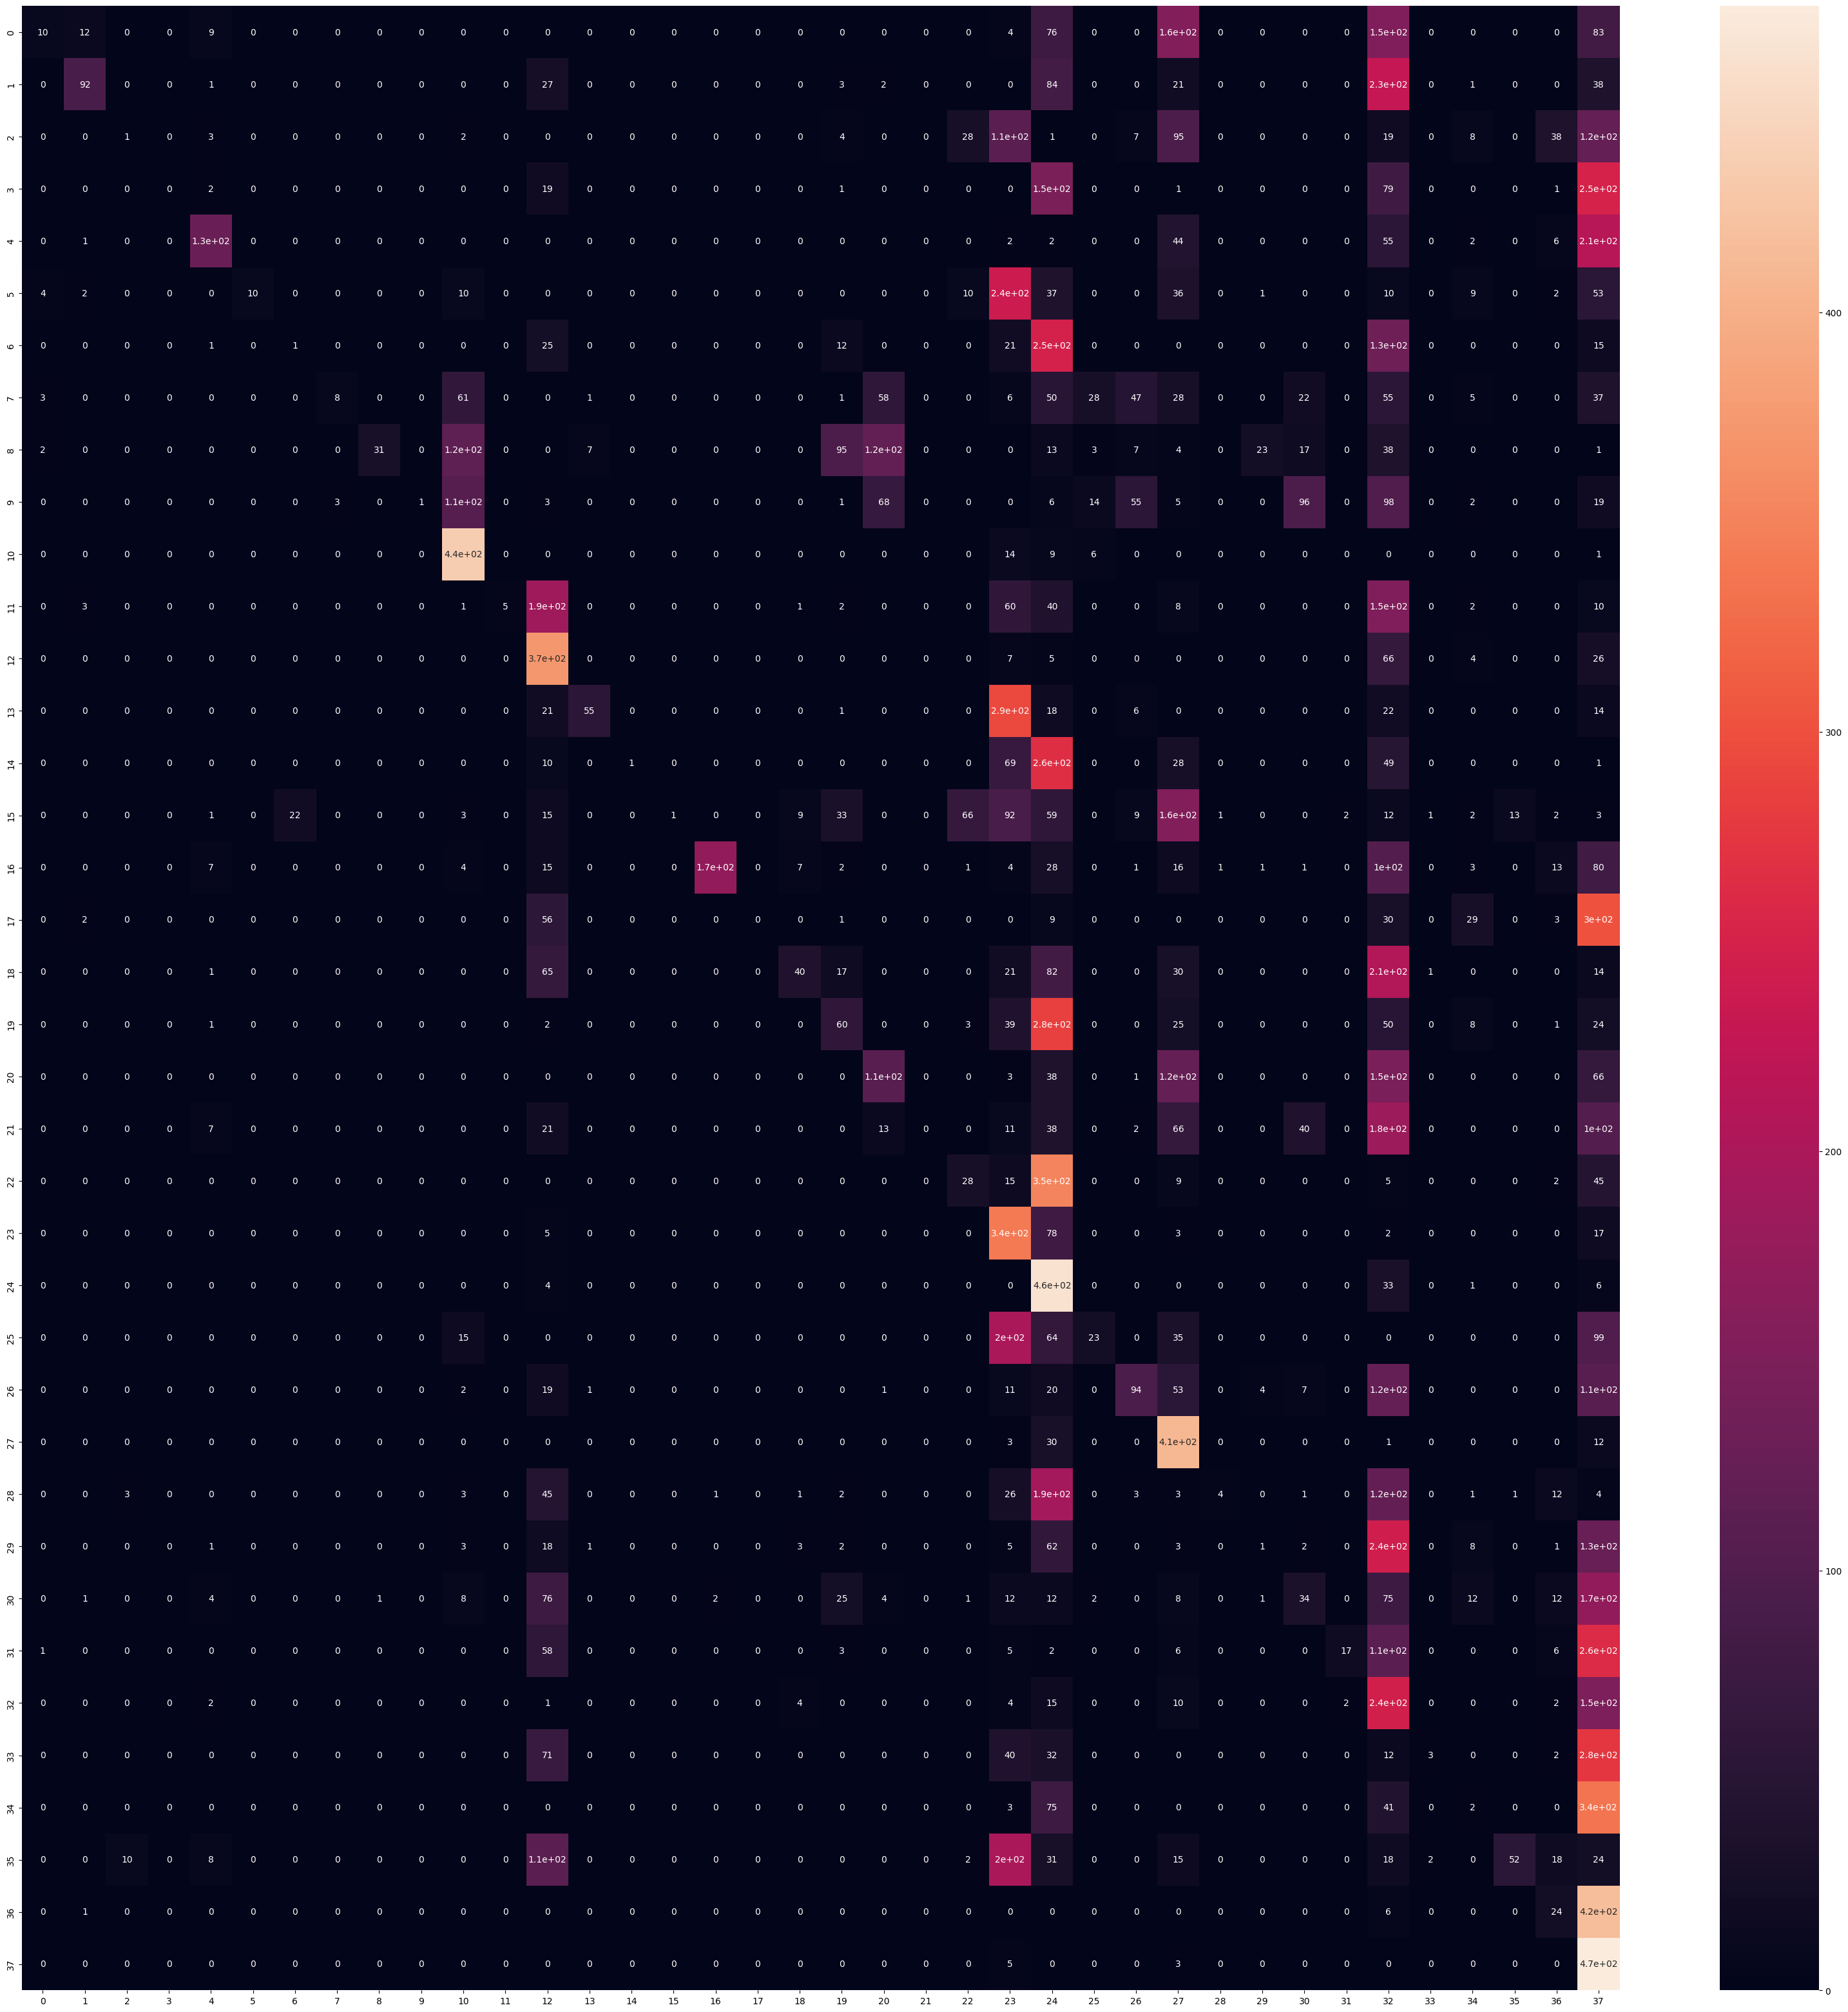

In [ ]:
import seaborn as sns
plt.figure(figsize=(40,40))
sns.heatmap(cn, annot=True)
plt.show()
